
# Анализ бизнес-показателей для развлекательного проекта



---
## Контекст


Мы делаем проект для развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации.


## Задача

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.


---
## План работы


* `Шаг 1.` Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 
 
* `Шаг 2.` Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии


* `Шаг 3.` Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:

>  - Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
>  - Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
>  - По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.


* `Шаг 4.` Маркетинг

 Выясним:

> - Сколько денег потратили? Всего / на каждый источник / по времени
> - Сколько в среднем стоило привлечение одного покупателя из каждого источника?

* `Шаг 5.` Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:

> - Проанализируем общую окупаемость рекламы;
> - Проанализируем окупаемость рекламы с разбивкой по устройствам;
> - Проанализируем окупаемость рекламы с разбивкой по странам;
> - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые мы обнаружили. Ответим на вопросы:

> - Окупается ли реклама, направленная на привлечение пользователей в целом? 
> - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
> - Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

* `Шаг 6.` Выводы

> - Выделим причины неэффективности привлечения пользователей;
> - Сформируем рекомендации для отдела маркетинга для повышения эффективности.


---
##  Описание данных

Таблица `visits_log_short` (лог сервера с информацией о посещениях сайта):

   * `User Id` — уникальный идентификатор пользователя
   * `Device` — категория устройства пользователя
   * `Session start` — дата и время начала сессии
   * `Session End` — дата и время окончания сессии
   * `Channel` — идентификатор рекламного источника, из которого пришел пользователь
   * `Region` - страна пользователя

Таблица `orders_log_short` (информация о заказах):

   * `User Id` — уникальный id пользователя, который сделал заказ
   * `Event Dt` — дата и время покупки
   * `Revenue` — выручка

Таблица `costs_short` (информация о затратах на маркетинг):

   * `Channel` — идентификатор рекламного источника
   * `Dt` — дата
   * `Costs` — затраты на этот рекламный источник в этот день

Импортируем библиотеки.

In [4]:
import pandas as pd
from datetime import datetime, timedelta
import decimal
import numpy as np
from matplotlib import pyplot as plt

Сохраняем данные в переменные.

In [5]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('/Users/ivan_miroshnichenko/Downloads/datasets/visits_info_short.csv')
    orders = pd.read_csv('/Users/ivan_miroshnichenko/Downloads/datasets/orders_info_short.csv')
    costs = pd.read_csv('/Users/ivan_miroshnichenko/Downloads/datasets/costs_info_short.csv')
    

Смотрим в первый раз на данные.

In [6]:
display(visits.sample(20), orders.sample(20), costs.sample(20))

,User Id,Region,Device,Channel,Session Start,Session End
308165,40417063442,UK,PC,WahooNetBanner,2019-10-27 04:10:33,2019-10-27 05:04:58
119669,641422631426,United States,Mac,organic,2019-08-23 13:25:08,2019-08-23 14:21:50
187038,120593710349,United States,iPhone,TipTop,2019-10-14 23:35:34,2019-10-15 00:16:22
226288,186007449902,France,PC,WahooNetBanner,2019-06-08 07:41:47,2019-06-08 08:15:52
46369,72796977759,United States,iPhone,organic,2019-06-18 09:48:15,2019-06-18 10:34:47
275845,141396418267,France,PC,organic,2019-09-07 11:59:16,2019-09-07 12:20:42
279053,186007449902,France,PC,WahooNetBanner,2019-09-14 08:24:52,2019-09-14 08:42:59
285741,886696392851,Germany,iPhone,LeapBob,2019-09-24 02:33:37,2019-09-24 02:58:41
186273,330753106255,United States,iPhone,TipTop,2019-10-13 01:24:38,2019-10-13 02:22:01
257199,170048429574,UK,PC,OppleCreativeMedia,2019-08-07 03:41:28,2019-08-07 03:58:27


,User Id,Event Dt,Revenue
23056,289085515752,2019-10-09 15:23:49,4.99
38077,860541541271,2019-10-10 02:41:17,4.99
37542,893472829380,2019-10-05 04:14:50,4.99
16476,724004617757,2019-09-06 05:23:13,4.99
148,301452416860,2019-05-06 09:42:07,4.99
21283,810882956169,2019-10-01 15:33:56,4.99
6773,368387429875,2019-07-08 21:26:12,4.99
19386,815205909469,2019-09-22 12:27:31,5.99
3447,55994240093,2019-06-14 10:51:47,4.99
38507,271024856207,2019-10-15 13:13:36,4.99


,dt,Channel,costs
1634,2019-05-15,lambdaMediaAds,11.20
150,2019-09-28,FaceBoom,295.90
751,2019-06-01,YRabbit,5.40
761,2019-06-11,YRabbit,1.80
292,2019-08-21,MediaTornado,5.28
1480,2019-06-10,WahooNetBanner,28.20
118,2019-08-27,FaceBoom,216.70
1265,2019-05-06,OppleCreativeMedia,5.00
1124,2019-06-14,LeapBob,7.14
1460,2019-05-21,WahooNetBanner,10.80


Приведем названия столбцов к снэйк кейсу и нижнему регистру.

In [7]:
visits = visits.rename(columns={'Session End': 'session_end', 'Session Start': 'session_start', 'User Id': 'user_id'})
visits.columns = visits.columns.str.lower()

orders = orders.rename(columns={'User Id': 'user_id','Event Dt': 'event_dt'})
orders.columns = orders.columns.str.lower()

costs.columns = costs.columns.str.lower()

Взглянем на изменения.

In [8]:
display(visits.sample(20))
display(visits.info())
display(orders.sample(20))
display(orders.info())
display(costs.sample(20))
display(costs.info())

,user_id,region,device,channel,session_start,session_end
136365,766981064056,United States,Android,TipTop,2019-09-06 06:06:58,2019-09-06 06:52:59
295560,588915951114,Germany,Android,organic,2019-10-07 05:25:20,2019-10-07 05:58:28
36065,838205526428,United States,Android,organic,2019-06-06 14:59:10,2019-06-06 15:03:41
279565,915146425261,Germany,PC,OppleCreativeMedia,2019-09-14 15:06:23,2019-09-14 15:10:57
153759,187745597730,United States,iPhone,TipTop,2019-09-22 19:25:34,2019-09-22 20:00:21
16102,685696222920,United States,Android,RocketSuperAds,2019-05-18 22:03:09,2019-05-18 22:16:04
228737,55106045116,France,PC,OppleCreativeMedia,2019-06-14 21:17:14,2019-06-14 21:24:24
3537,792254835557,United States,iPhone,FaceBoom,2019-05-05 00:52:28,2019-05-05 01:00:10
99982,377886441153,United States,Android,organic,2019-08-07 22:51:32,2019-08-07 22:51:33
206017,547543739829,United States,Android,organic,2019-10-29 13:24:37,2019-10-29 15:03:50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,user_id,event_dt,revenue
34112,398297234309,2019-08-27 10:32:11,4.99
13752,363174698849,2019-08-22 08:46:05,4.99
24997,439735851429,2019-10-18 09:01:04,4.99
22195,196208399677,2019-10-05 01:06:26,4.99
38669,391688158393,2019-10-16 00:44:22,4.99
39732,504292331293,2019-10-26 05:05:13,4.99
1237,586391395648,2019-05-22 13:36:37,4.99
28765,456032034547,2019-05-29 14:11:37,4.99
26213,168998433054,2019-10-23 19:02:39,4.99
9302,554693589456,2019-07-25 15:55:57,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,dt,channel,costs
456,2019-08-05,RocketSuperAds,14.560
1174,2019-08-03,LeapBob,10.920
1212,2019-09-10,LeapBob,9.660
1325,2019-07-05,OppleCreativeMedia,14.750
276,2019-08-05,MediaTornado,4.800
1560,2019-08-29,WahooNetBanner,35.400
545,2019-05-06,TipTop,78.000
1072,2019-10-20,AdNonSense,25.200
785,2019-07-05,YRabbit,4.320
568,2019-05-29,TipTop,212.800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Создадим столбцы с датой начала сессии, неделей когда была начата сессия и месяцем сессии. Приведем все столбцы, где храним даты к формату datetime.

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits['session_date'] = visits['session_start'].dt.date
visits['session_week'] = visits['session_start'].dt.isocalendar().week
visits['session_month'] = visits['session_start'].dt.month
visits['session_duration'] = visits['session_end'] - visits['session_start']
visits['session_duration'] = visits['session_duration'].apply(lambda x: decimal.Decimal(x.seconds) // 60)
visits['session_duration'] = visits['session_duration'].astype('int')
visits['session_date'] = pd.to_datetime(visits['session_date'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Взглянем на обновленные данные.

In [10]:
display(
        visits.sample(20),
        visits.info(),
        orders.sample(20),
        orders.info(),
        costs.sample(20),
        costs.info()
        )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           309901 non-null  int64         
 1   region            309901 non-null  object        
 2   device            309901 non-null  object        
 3   channel           309901 non-null  object        
 4   session_start     309901 non-null  datetime64[ns]
 5   session_end       309901 non-null  datetime64[ns]
 6   session_date      309901 non-null  datetime64[ns]
 7   session_week      309901 non-null  UInt32        
 8   session_month     309901 non-null  int64         
 9   session_duration  309901 non-null  int64         
dtypes: UInt32(1), datetime64[ns](3), int64(3), object(3)
memory usage: 22.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype    

,user_id,region,device,channel,session_start,session_end,session_date,session_week,session_month,session_duration
294807,927324024142,France,iPhone,organic,2019-10-06 06:17:47,2019-10-06 06:59:02,2019-10-06,40,10,41
150582,835339616865,United States,Mac,FaceBoom,2019-09-19 19:51:33,2019-09-19 19:54:26,2019-09-19,38,9,2
126107,421321341640,United States,iPhone,TipTop,2019-08-29 04:52:04,2019-08-29 05:13:03,2019-08-29,35,8,20
12972,11502629125,United States,Mac,organic,2019-05-15 10:02:06,2019-05-15 10:03:45,2019-05-15,20,5,1
296729,546796337949,UK,Android,AdNonSense,2019-10-09 17:03:25,2019-10-09 17:14:45,2019-10-09,41,10,11
51733,686176394757,United States,iPhone,TipTop,2019-06-24 01:54:26,2019-06-24 03:52:45,2019-06-24,26,6,118
123387,270766591939,United States,Android,FaceBoom,2019-08-26 10:18:48,2019-08-26 11:11:40,2019-08-26,35,8,52
302738,220317349642,UK,PC,lambdaMediaAds,2019-10-19 11:42:11,2019-10-19 13:59:40,2019-10-19,42,10,137
304473,570096279549,UK,Android,organic,2019-10-21 13:17:07,2019-10-21 13:17:17,2019-10-21,43,10,0
23631,434533175161,United States,Mac,TipTop,2019-05-25 05:17:44,2019-05-25 05:20:41,2019-05-25,21,5,2


None

,user_id,event_dt,revenue
5047,563354772503,2019-06-27 11:51:23,4.99
11279,347665115829,2019-08-07 13:00:34,4.99
33247,203133044460,2019-08-16 19:17:54,4.99
32470,893472829380,2019-08-06 09:12:45,4.99
22074,1115794256,2019-10-04 18:52:25,4.99
8436,802465511523,2019-07-19 07:10:36,4.99
27623,268020291948,2019-10-29 00:52:32,19.99
34439,14859878207,2019-08-31 07:19:35,4.99
21898,774309937011,2019-10-03 06:16:49,4.99
15796,308149935809,2019-09-02 23:20:39,5.99


None

,dt,channel,costs
891,2019-10-19,YRabbit,5.670
830,2019-08-19,YRabbit,4.200
784,2019-07-04,YRabbit,3.060
554,2019-05-15,TipTop,49.000
32,2019-06-02,FaceBoom,234.300
1279,2019-05-20,OppleCreativeMedia,4.750
819,2019-08-08,YRabbit,3.570
345,2019-10-13,MediaTornado,4.800
34,2019-06-04,FaceBoom,147.400
460,2019-08-09,RocketSuperAds,11.375


None

Смотрим на наличие пропусков и дубликатов.

In [11]:
print(
        'Количество пропусков visits -', costs.isnull().sum(),
        'Количество пропусков orders -', orders.isnull().sum(),
        'Количество пропусков costs -', visits.isnull().sum()
        )

print(
        'Количество дубликатов visits -', visits.duplicated().sum(),
        'Количество дубликатов orders -', orders.duplicated().sum(),
        'Количество дубликатов costs -', costs.duplicated().sum()
        )

Количество пропусков visits - dt         0
channel    0
costs      0
dtype: int64 Количество пропусков orders - user_id     0
event_dt    0
revenue     0
dtype: int64 Количество пропусков costs - user_id             0
region              0
device              0
channel             0
session_start       0
session_end         0
session_date        0
session_week        0
session_month       0
session_duration    0
dtype: int64
Количество дубликатов visits - 0 Количество дубликатов orders - 0 Количество дубликатов costs - 0


Качество исходных данных отличное, так как отсутствуют дубликаты и пропуски.

# Функции для расчета и анализа LTV, ROI, удержания и конверсии

Зададим функции необходимые нам для анализа.

Функция для формирования пользовательских профилей.

In [12]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

Функция для расчёта удержания.

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчета конверсии.

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта LTV и ROI.

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для визуализации удержания.


In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV и ROI.

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации конверсии.

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Исследовательский анализ данных


Построим профили пользователей.


In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(20)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
115867,772068581821,2019-05-20 22:32:03,YRabbit,iPhone,United States,2019-05-20,2019-05-01,False,0.300000
77145,511969722988,2019-06-09 11:52:32,FaceBoom,iPhone,United States,2019-06-09,2019-06-01,False,1.114966
99727,664650548734,2019-05-22 15:09:22,YRabbit,Mac,United States,2019-05-22,2019-05-01,False,0.272727
113705,757860489551,2019-05-03 23:08:04,FaceBoom,iPhone,United States,2019-05-03,2019-05-01,False,1.128947
134507,896876332768,2019-07-04 15:28:55,organic,Mac,United States,2019-07-04,2019-07-01,False,0.000000
13965,92884750163,2019-05-20 13:14:07,organic,Mac,United States,2019-05-20,2019-05-01,False,0.000000
140366,936230290918,2019-07-29 01:52:34,FaceBoom,Mac,United States,2019-07-29,2019-07-01,False,1.131429
87260,580716555801,2019-09-02 08:01:29,FaceBoom,iPhone,United States,2019-09-02,2019-09-01,False,1.120122
124722,831573150002,2019-08-14 19:57:20,AdNonSense,PC,Germany,2019-08-14,2019-08-01,True,0.991667
112726,751065767464,2019-09-30 13:23:15,FaceBoom,Mac,United States,2019-09-30,2019-09-01,False,1.081743


Определяем минимальную и максимальную даты привлечения пользователей.

In [21]:
print('Минимальную дата привлечения пользователей -', profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей -', profiles['first_ts'].max())

Минимальную дата привлечения пользователей - 2019-05-01 00:00:41
Максимальная дата привлечения пользователей - 2019-10-27 23:59:04


Минимальная и максимальная дата привлечения пользователя соответствуют условиям ТЗ. Можно проводить анализ далее.

Определим количество платящих пользователей для каждого региона, и какой процент они составляют от общего числа пользователей в регионе.

In [22]:
users_per_region = profiles.pivot_table(index='region', values='payer', aggfunc='count')
payer_per_region = profiles.query('payer == True').pivot_table(index='region', values='payer', aggfunc='count')
payer_per_region = users_per_region.merge(payer_per_region,how='inner', on='region')
payer_per_region['%'] = payer_per_region['payer_y'] / payer_per_region['payer_x']
payer_per_region = payer_per_region.rename(columns={'payer_x':'total_user', 'payer_y':'payer', '%':'percent_of_total'})
payer_per_region.style.format({('percent_of_total'):'{:.2%}'})

,total_user,payer,percent_of_total
region,,,
France,17450,663,3.80%
Germany,14981,616,4.11%
UK,17575,700,3.98%
United States,100002,6902,6.90%


Определим количество платящих пользователей для каждого канала привлечения, и какой процент они составляют от общего числа пользователей из этого канала.

In [23]:
users_per_channel = profiles.pivot_table(index='channel', values='payer', aggfunc='count')
payer_per_channel = profiles.query('payer == True').pivot_table(index='channel', values='payer', aggfunc='count')
payer_per_channel = users_per_channel.merge(payer_per_channel,how='inner', on='channel')
payer_per_channel['%'] = payer_per_channel['payer_y'] / payer_per_channel['payer_x']
payer_per_channel = payer_per_channel.rename(columns={'payer_x':'total_user', 'payer_y':'payer', '%':'percent_of_total'})
payer_per_channel.style.format({('percent_of_total'):'{:.2%}'})

,total_user,payer,percent_of_total
channel,,,
AdNonSense,3880,440,11.34%
FaceBoom,29144,3557,12.20%
LeapBob,8553,262,3.06%
MediaTornado,4364,156,3.57%
OppleCreativeMedia,8605,233,2.71%
RocketSuperAds,4448,352,7.91%
TipTop,19561,1878,9.60%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%


Определим количество платящих пользователей для каждого типа устройств, и какой процент они составляют от общего числа пользователей каждого типа устройств.

In [24]:
users_per_device = profiles.pivot_table(index='device', values='payer', aggfunc='count')
payer_per_device = profiles.query('payer == True').pivot_table(index='device', values='payer', aggfunc='count')
payer_per_device = users_per_device.merge(payer_per_device,how='inner', on='device')
payer_per_device['%'] = payer_per_device['payer_y'] / payer_per_device['payer_x']
payer_per_device = payer_per_device.rename(columns={'payer_x':'total_user', 'payer_y':'payer', '%':'percent_of_total'})
payer_per_device.style.format({('percent_of_total'):'{:.2%}'})

,total_user,payer,percent_of_total
device,,,
Android,35032,2050,5.85%
Mac,30042,1912,6.36%
PC,30455,1537,5.05%
iPhone,54479,3382,6.21%


Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

# Шаг 4. Маркетинг

Взглянем на совокупные траты на маркетинг.


In [25]:
print('Траты на маркетинг по всем источникам:', round((costs['costs'].sum()),2))

Траты на маркетинг по всем источникам: 105497.3


Посмотрим, как это распределилось по источникам.

In [26]:
costs_per_channel = costs.groupby('channel')['costs'].sum()
costs_per_channel = costs_per_channel.sort_values(ascending = False).reset_index()
costs_per_channel['cost_%'] = costs_per_channel['costs']/costs['costs'].sum()
costs_per_channel.style.format({('cost_%'):'{:.2%}'})

,channel,costs,cost_%
0,TipTop,54751.300000,51.90%
1,FaceBoom,32445.600000,30.75%
2,WahooNetBanner,5151.000000,4.88%
3,AdNonSense,3911.250000,3.71%
4,OppleCreativeMedia,2151.250000,2.04%
5,RocketSuperAds,1833.000000,1.74%
6,LeapBob,1797.600000,1.70%
7,lambdaMediaAds,1557.600000,1.48%
8,MediaTornado,954.480000,0.90%
9,YRabbit,944.220000,0.90%


Больше всего бюджета аккумулируют TipTop и FaceBoom.

Посмторим траты на каждый источник в разбивке по месяцам.

In [27]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs_per_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_per_month

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


In [28]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs_per_week = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_per_week

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.20,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.90,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.30,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.40,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.80,83.2
23,102.90,1081.3,66.99,27.60,79.50,76.050,1223.6,196.8,25.80,35.2
24,96.60,1042.8,52.29,29.76,71.50,63.180,1121.0,166.2,17.46,45.6
25,141.75,1280.4,68.46,32.16,79.75,80.730,1474.4,201.6,22.14,40.0
26,148.05,1647.8,99.75,40.56,107.00,78.260,2343.6,285.0,27.90,59.2


Text(0, 0.5, 'Сумма')

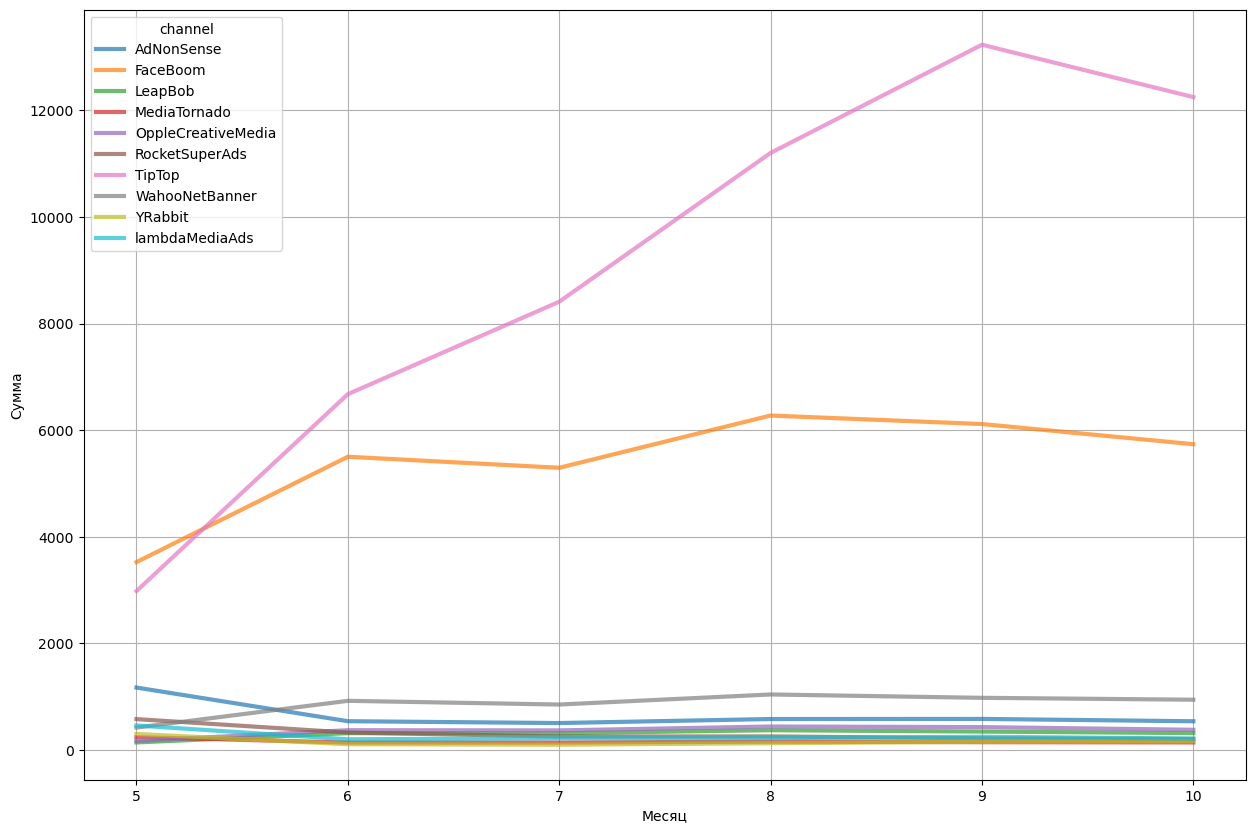

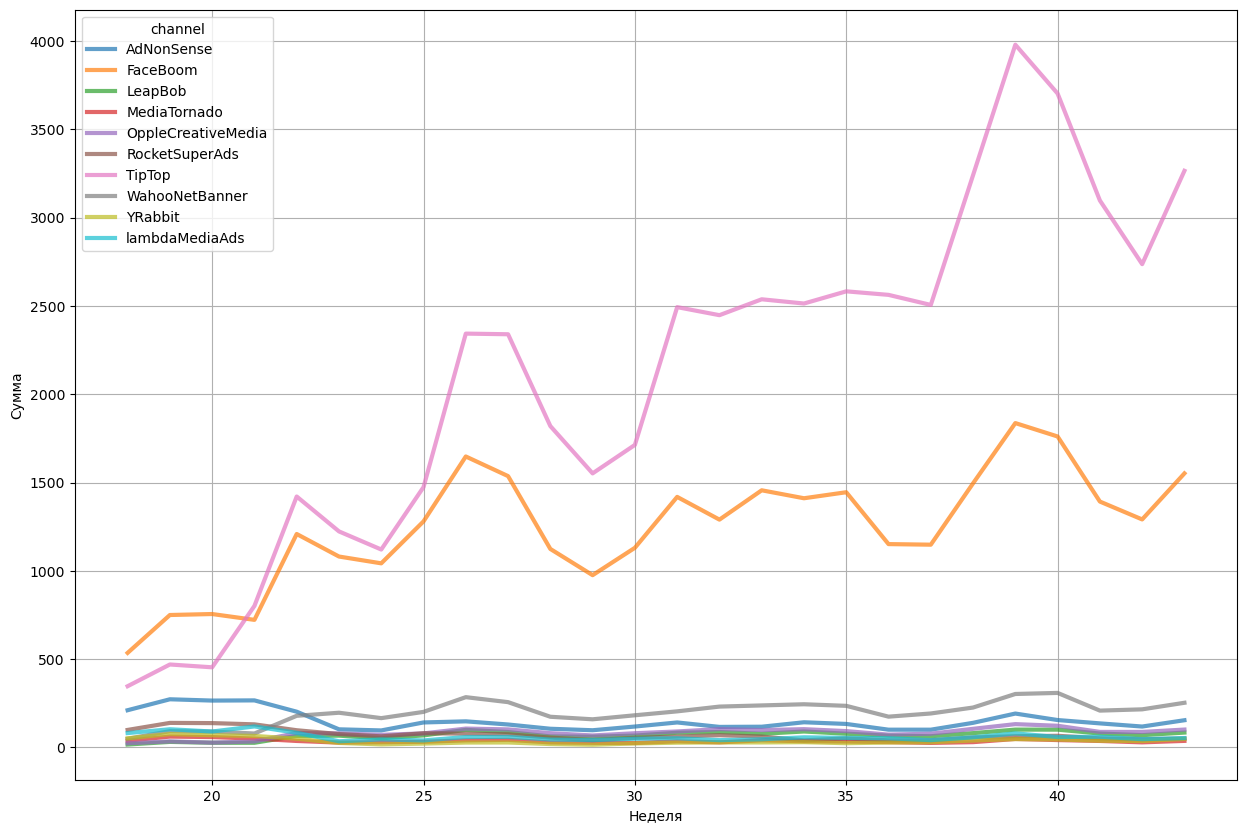

In [29]:
costs_per_month.plot(linewidth=3,
                     alpha=0.7,
                     figsize=(15,10),
                     grid = True) 
plt.xlabel('Месяц')
plt.ylabel('Сумма')

costs_per_week.plot(linewidth=3,
                    alpha=0.7,
                    figsize=(15,10),
                    grid = True) 
plt.xlabel('Неделя')
plt.ylabel('Сумма')

При сопоставлении с данными о конверсии, данные из таблицы о увеличение бюджета для TipTop и FaceBoom не дают должного результата, и напротив lambdaMediaAds при кратно меньших бюджетах дают результаты гораздо лучше.

Смотрим САС по каналам и динамику ее роста.

In [30]:
report_cac = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

display(report_cac)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


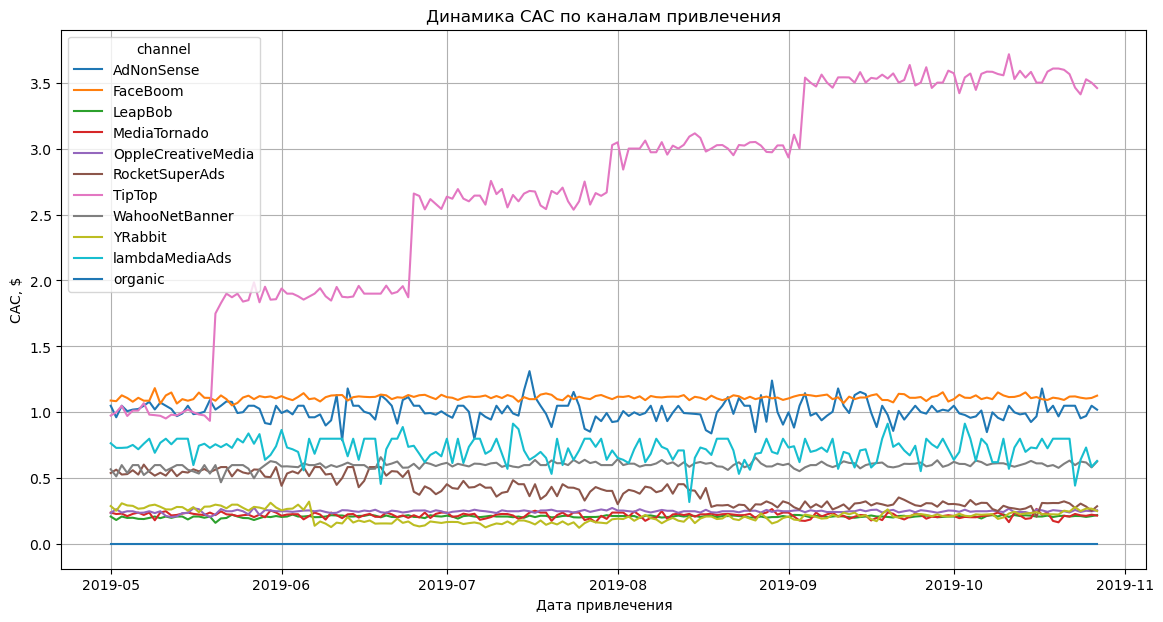

In [31]:
profiles.pivot_table(index='dt',
                     columns='channel',
                     values='acquisition_cost',
                     aggfunc='mean').plot(grid=True, figsize=(14,7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Наиболее высокий САС у TipTop и он постоянно возрастал по мере развития событий. По остальным источникам САС практически не менялся.

# Оценить окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем `общую окупаемость рекламы`;
- Проанализируем окупаемость `рекламы с разбивкой по устройствам`;
- Проанализируем окупаемость `рекламы с разбивкой по странам`;
- Проанализируем окупаемость `рекламы с разбивкой по рекламным каналам`.

Опишем проблемы, которые обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрите данные `1-го ноября 2019 года` и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [32]:
observation_date = datetime(2019, 10, 27).date()  
horizon_days = 14

Смотрим конверсию по регионам.

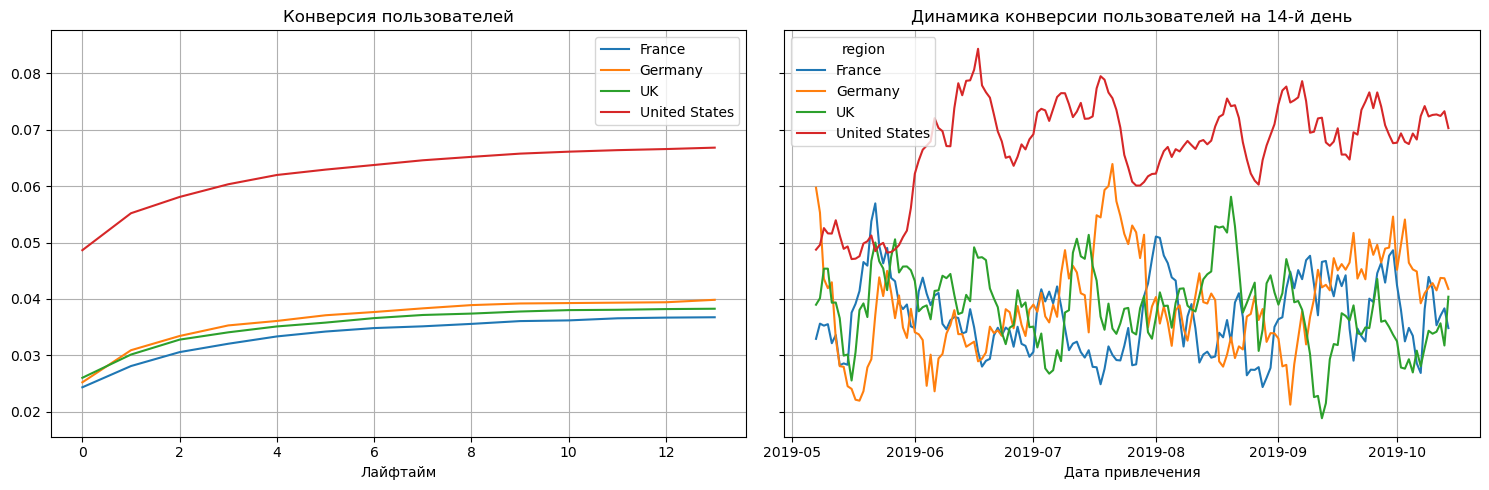

In [33]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Видим, что конверсия пользователей из США кратно выше чем из осталных регионов, как по лайфтайму так и в динамике.

Смотрим удержание по регионам.

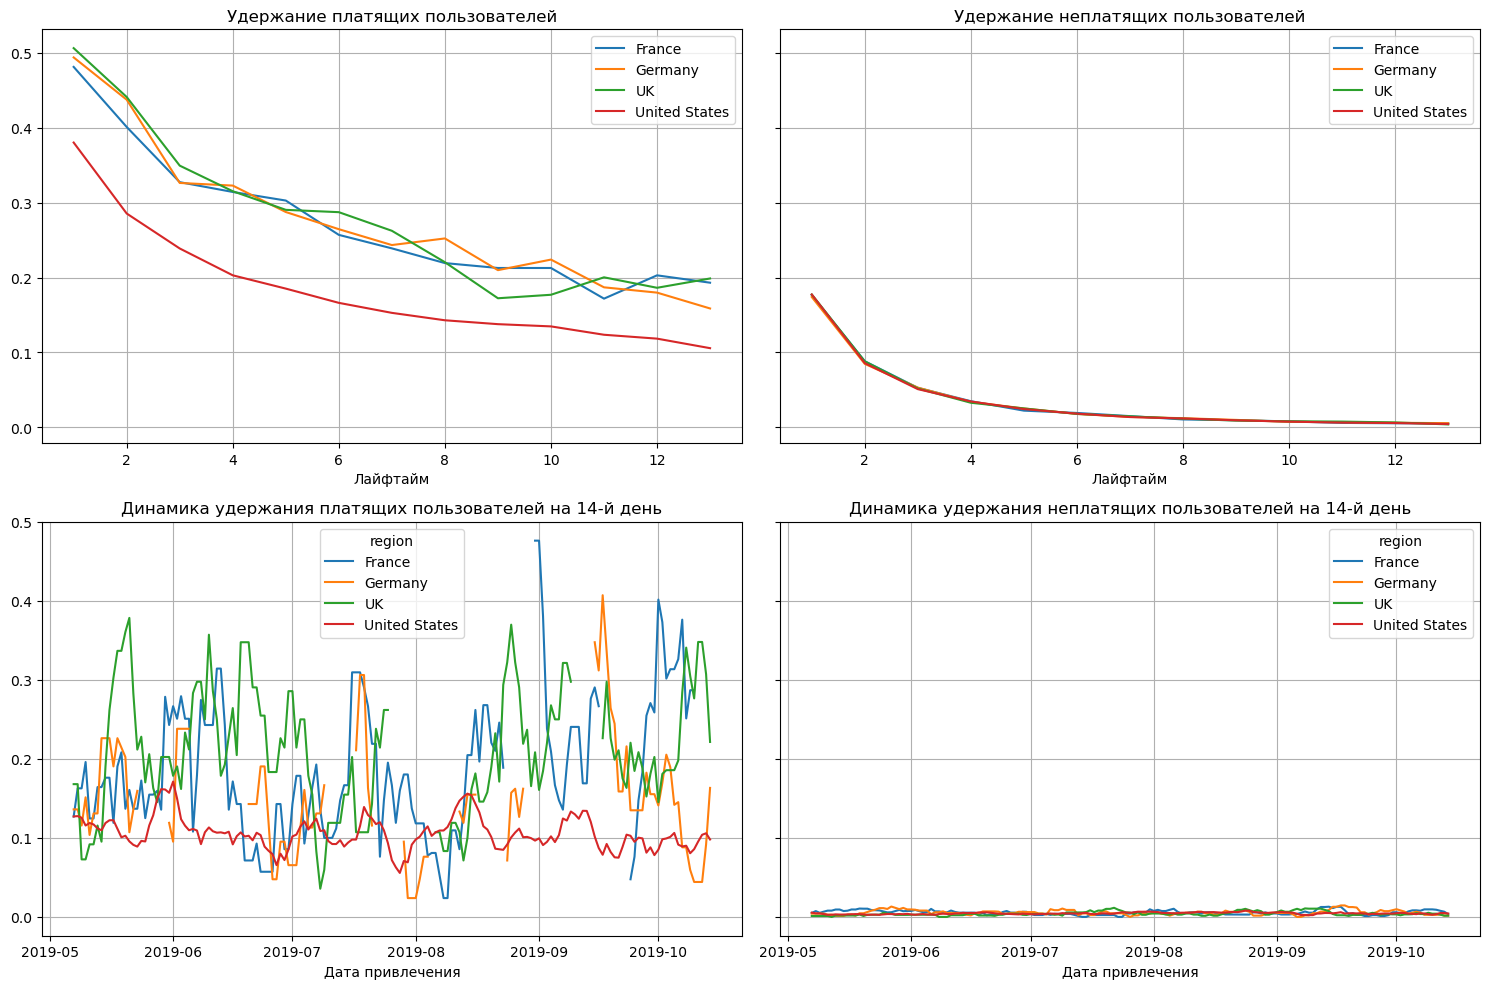

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [35]:
retention_grouped

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France               15574  1.0  0.176576  0.088288  0.052780  0.034930   
      Germany              13308  1.0  0.174031  0.084761  0.053051  0.034040   
      UK                   15607  1.0  0.177356  0.088037  0.051900  0.032870   
      United States        86089  1.0  0.177398  0.085760  0.051040  0.034580   
True  France                 611  1.0  0.481178  0.400982  0.327332  0.314239   
      Germany                567  1.0  0.493827  0.437390  0.326279  0.322751   
      UK                     644  1.0  0.506211  0.440994  0.349379  0.315217   
      United States         6365  1.0  0.380204  0.285467  0.238806  0.202985   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022345  0.019263  0.015025  0.010595  0.009567   
      Germany        0.025248  0.017959  0.013977  0.012248  0.009994   
      UK             0.025309  0.017941  0.014737  0.011661  0.009098   
      United States  0.024440  0.018318  0.013776  0.011906  0.009467   
True  France         0.302782  0.256956  0.238953  0.219313  0.212766   
      Germany        0.287478  0.264550  0.243386  0.252205  0.209877   
      UK             0.290373  0.287267  0.262422  0.220497  0.172360   
      United States  0.185232  0.166222  0.152867  0.142969  0.137785   

                           10        11        12        13  
payer region                                                 
False France         0.008026  0.005971  0.005522  0.005394  
      Germany        0.007439  0.006988  0.006162  0.005636  
      UK             0.008137  0.007753  0.006600  0.003973  
      United States  0.007655  0.006389  0.005808  0.004461  
True  France         0.212766  0.171849  0.202946  0.193126  
      Germany        0.223986  0.186949  0.179894  0.158730  
      UK             0.177019  0.200311  0.186335  0.198758  
      United States  0.134800  0.123645  0.118460  0.105734

С удержанием пользователей картина противоположная. Платящие пользователи из США показывают худший результат, нежели пользователи из Британии, Франции и Германии, как по лайфтайму так и в динамике.

Смотрим конверсию по каналам.

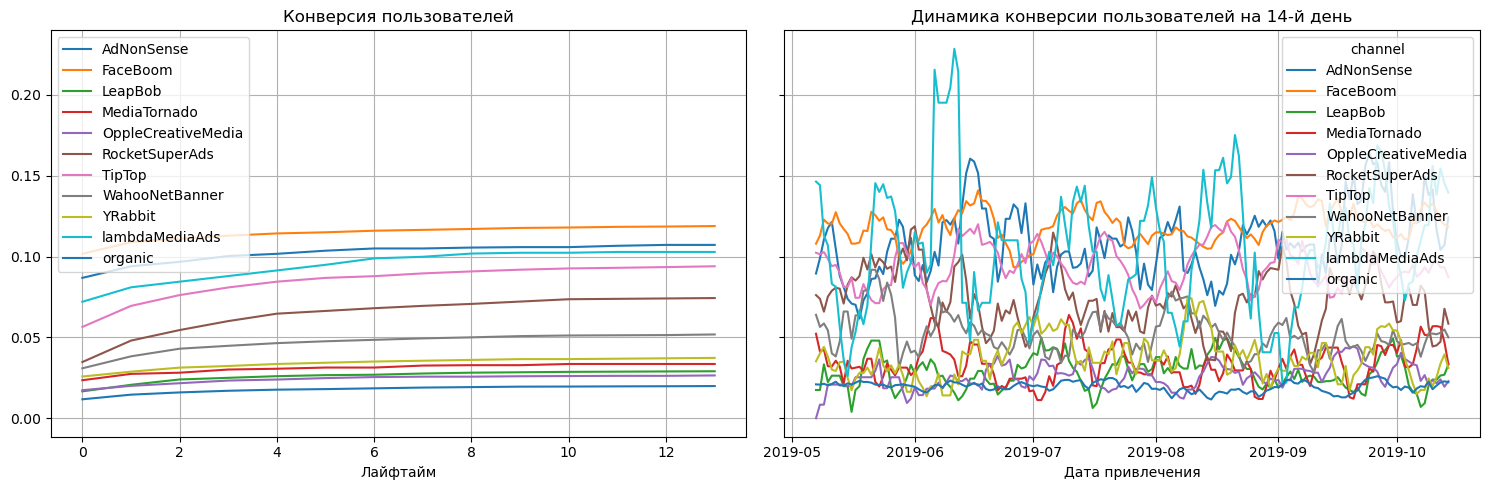

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Результаты каждого канала по лайфтайму колеблятся в пределах 0.1, что в целом не дает понимания, какой из них наиболее успешен или перспективен. Наиболее высокие значения показывают 'FaceBoom','AdNonSense' и 'lambdaMediaAds'. В динамике же только 'lambdaMediaAds', показывает значения немногим выше средних. 

Смотрим удержание по каналам.

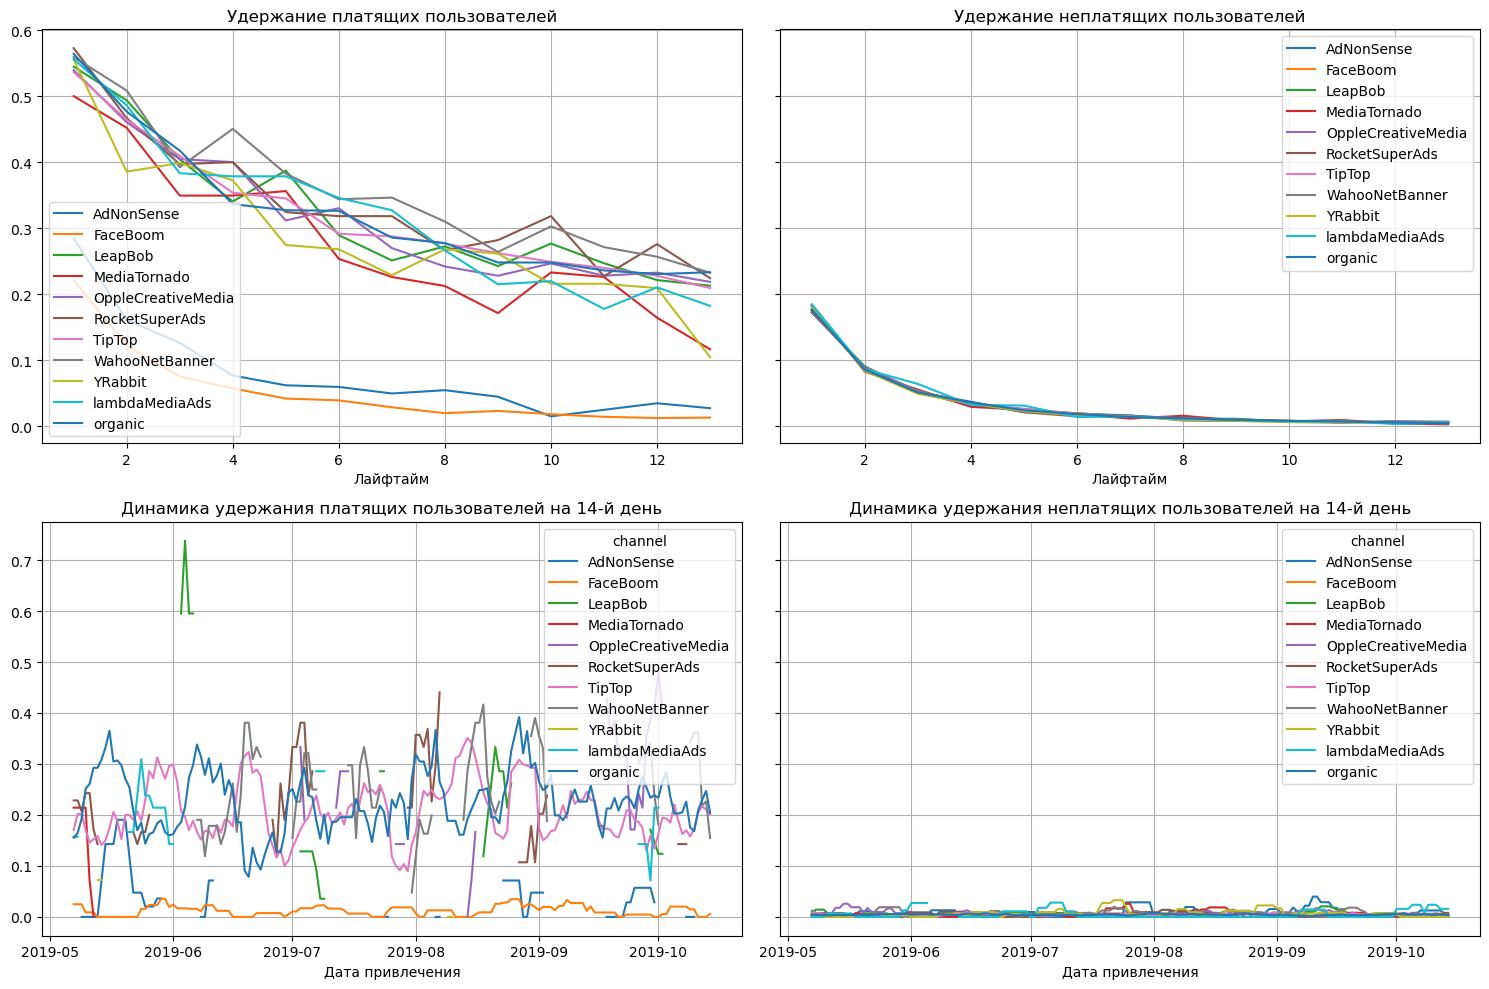

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В картине по лайфтайму видим, что 'FaceBoom' показывает наихудщий результат, схожий с органическими пользователями. 'WahooNetBanner', 'RocketsSuperAds' и 'lambdaMediaAds'показывают наилучший результат удержания пользователей.

Смотрим конверсию по устройствам.

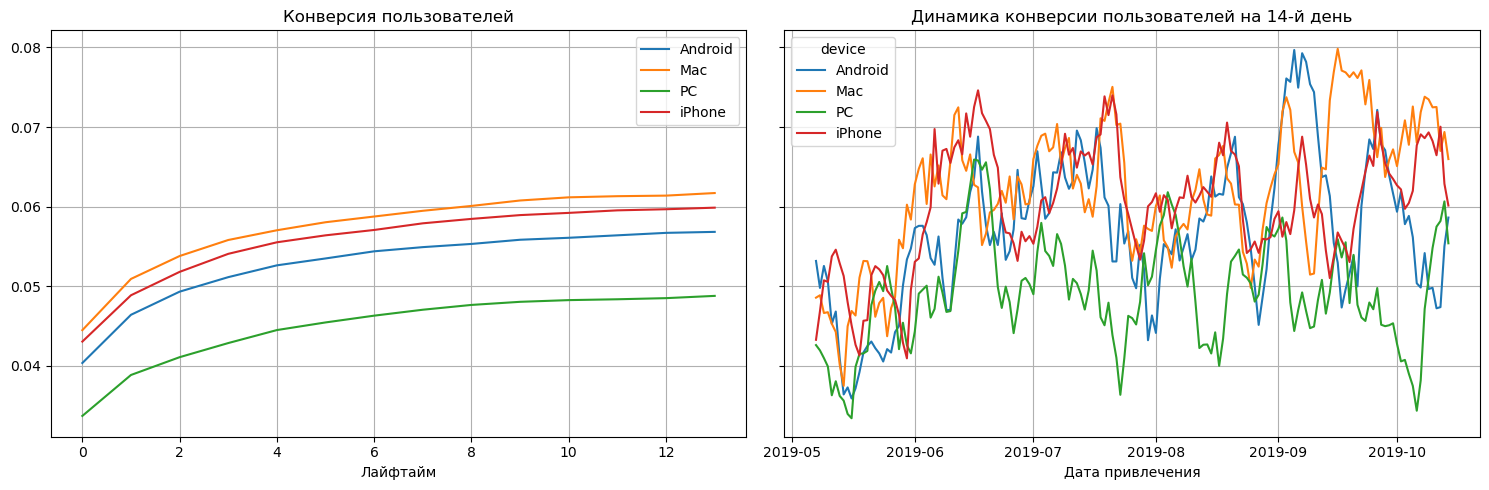

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наибольшие значения показывает Mac, Android и iPhone, как по лайфтайму так и в динамике.

Смотрим удержание по устройствам.

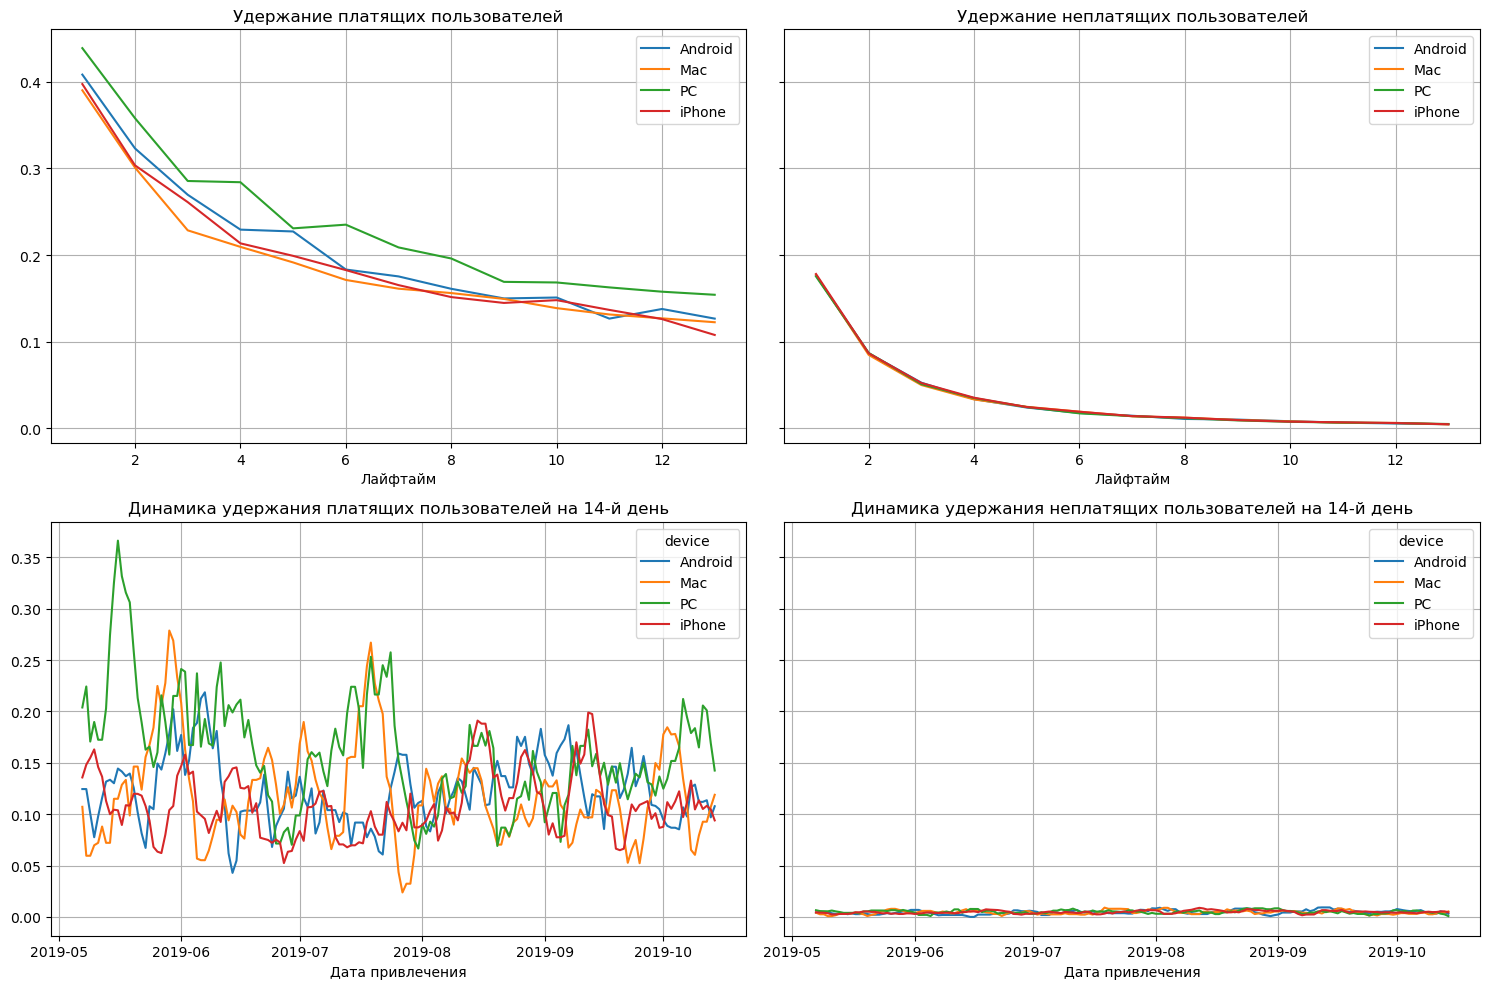

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По лайфтайму наилучшее удержание платящих пользователей показывает PC. В динамике так же довольно высокие значения у Mac.

### Общая окупаемость рекламы

In [40]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14
profiles = profiles.query('channel != "organic"')

Взглянем на значения LTV и ROI по всей совокупности данных.

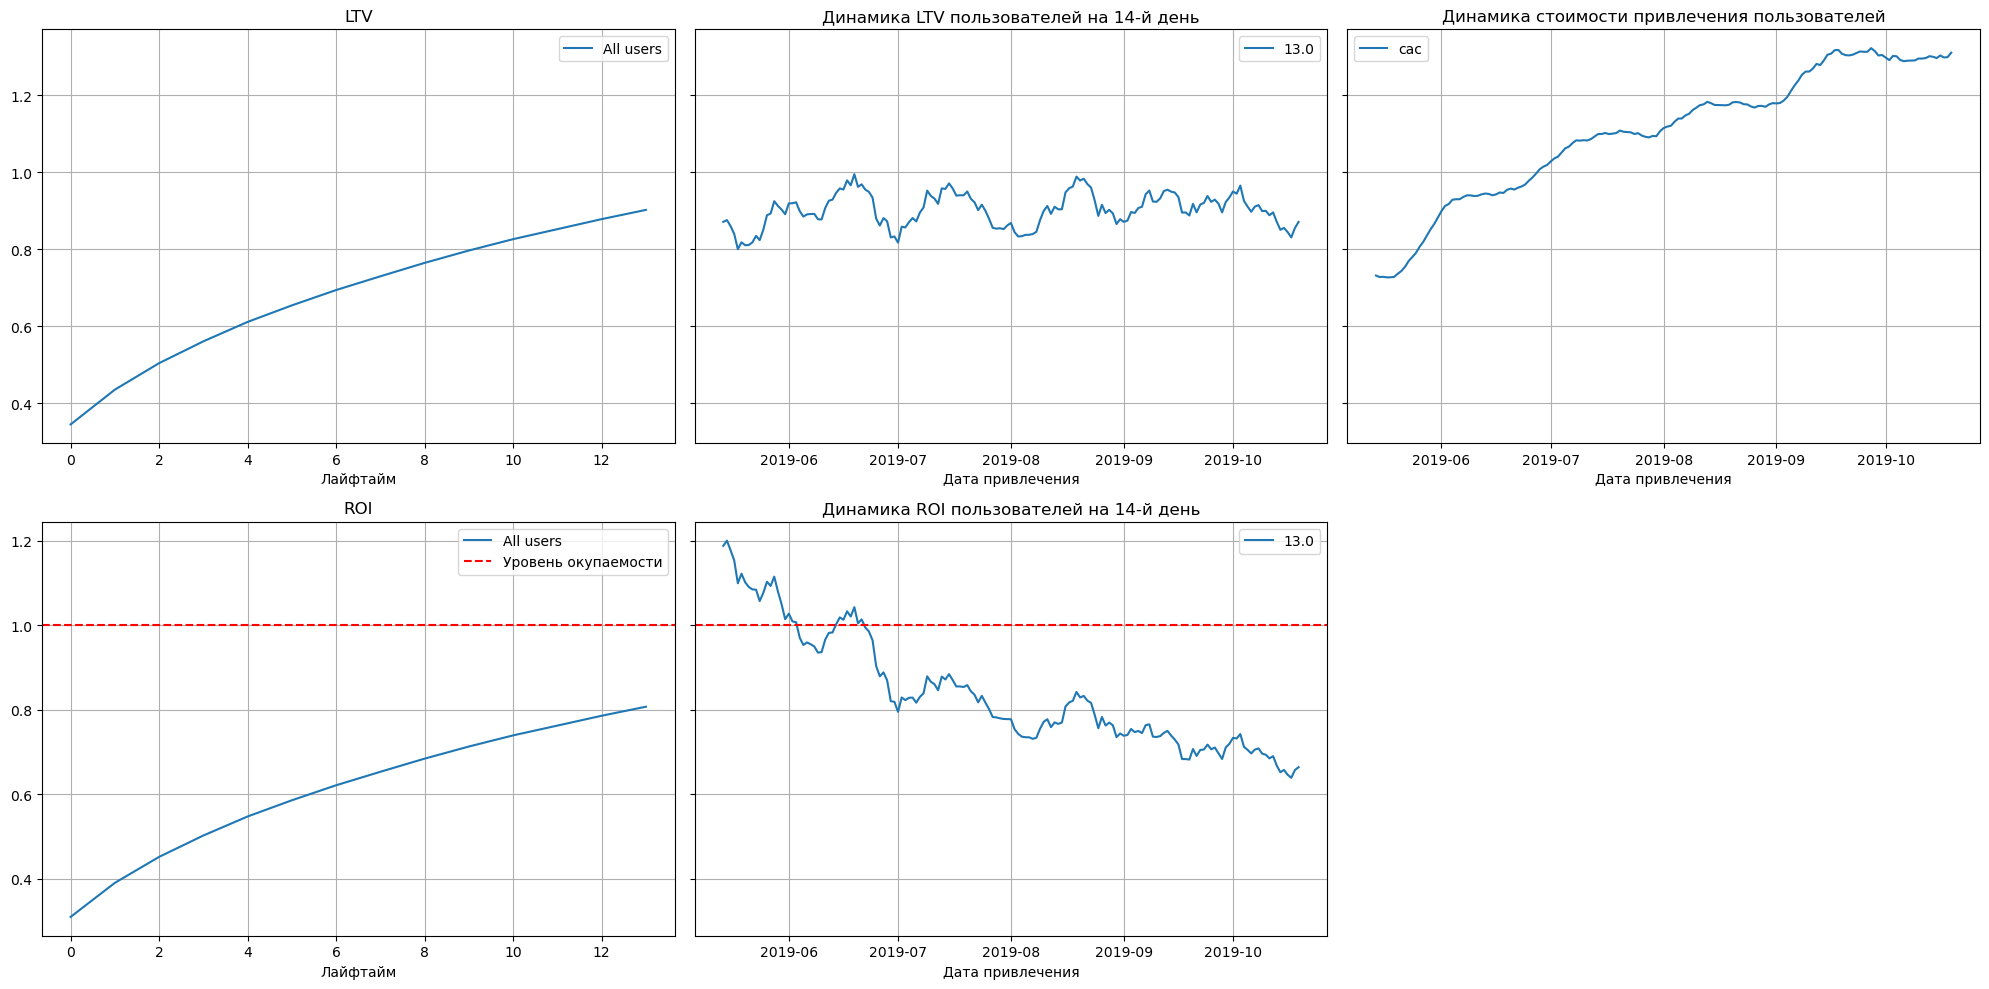

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.

### Окупаемость рекламы с разбивкой по устройствам

Взглянем на значения LTV и ROI с разбивкой по типу устройств.

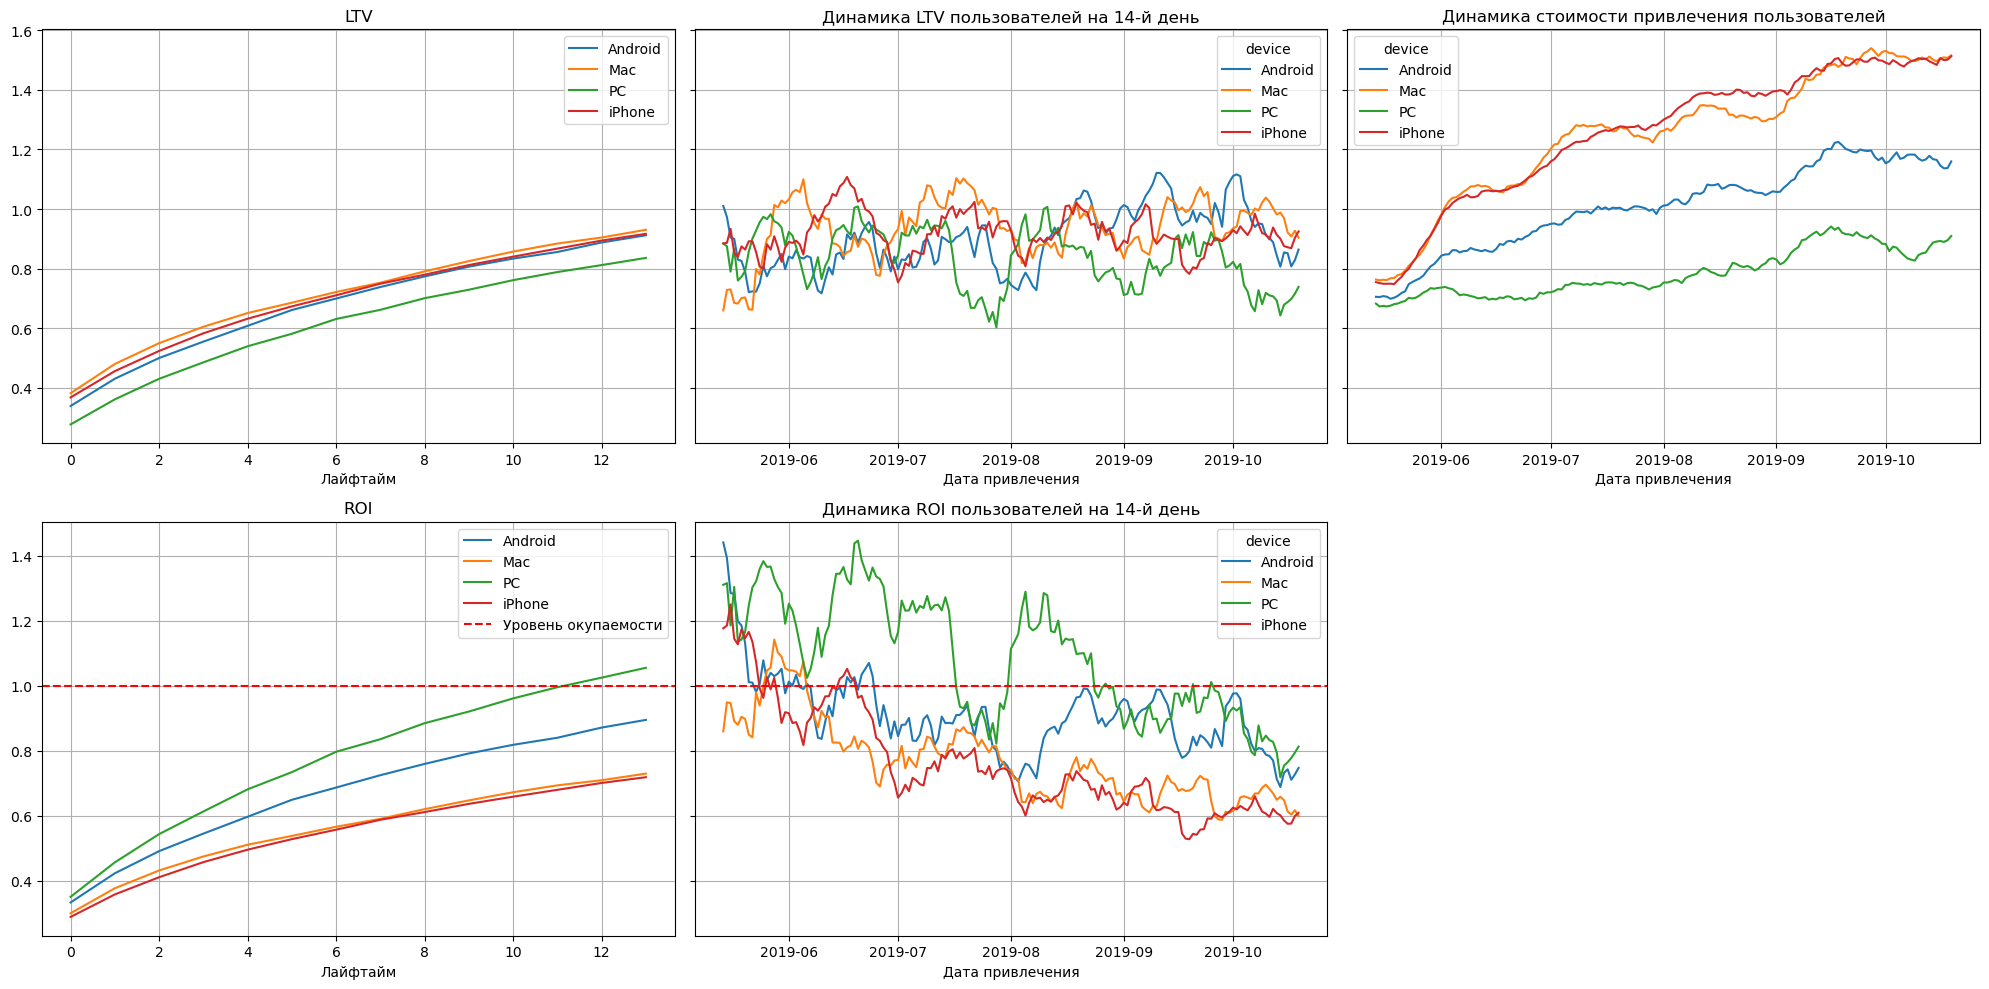

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наиболее перспективно выглядят данные PC. А именно: минимальный CAC среди других устройств и лучшие показатели по ROI, как по лайфтайму так и в динамике. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию.

### Окупаемость рекламы с разбивкой по странам

Взглянем на значения LTV и ROI с разбивкой по регионам.

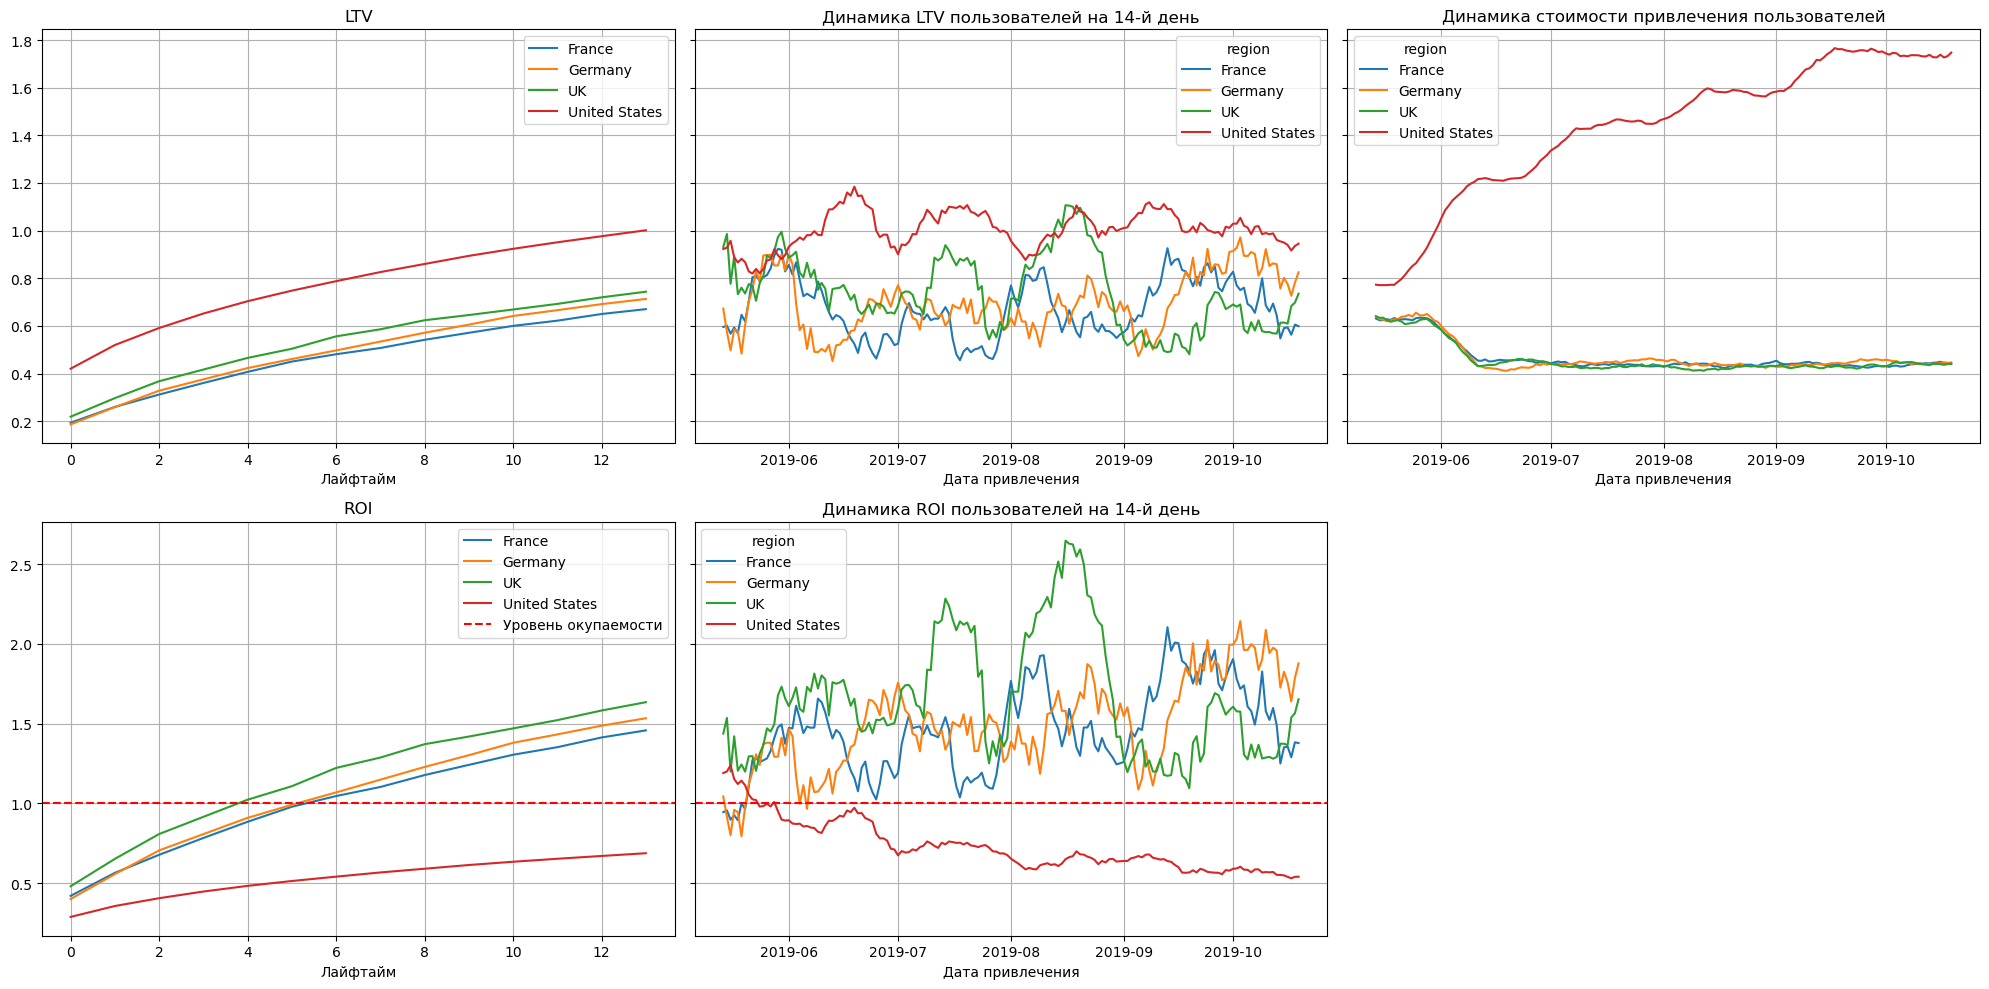

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В разбивке по регионам ситуация противоречивая. Есть фаворит по LTV - USA, но у этого региона плохие значения CAC, что портит значения ROI, а это ключевой показатель среди трех пересичсленных. У остальных трех регионов противоположная ситуация: значения LTV куда скромне, зато превосходные значения CAC и ROI значительно выше 1.0. 

### Окупаемость рекламы с разбивкой по рекламным каналам

Взглянем на значения LTV и ROI с разбивкой по рекламным каналам.

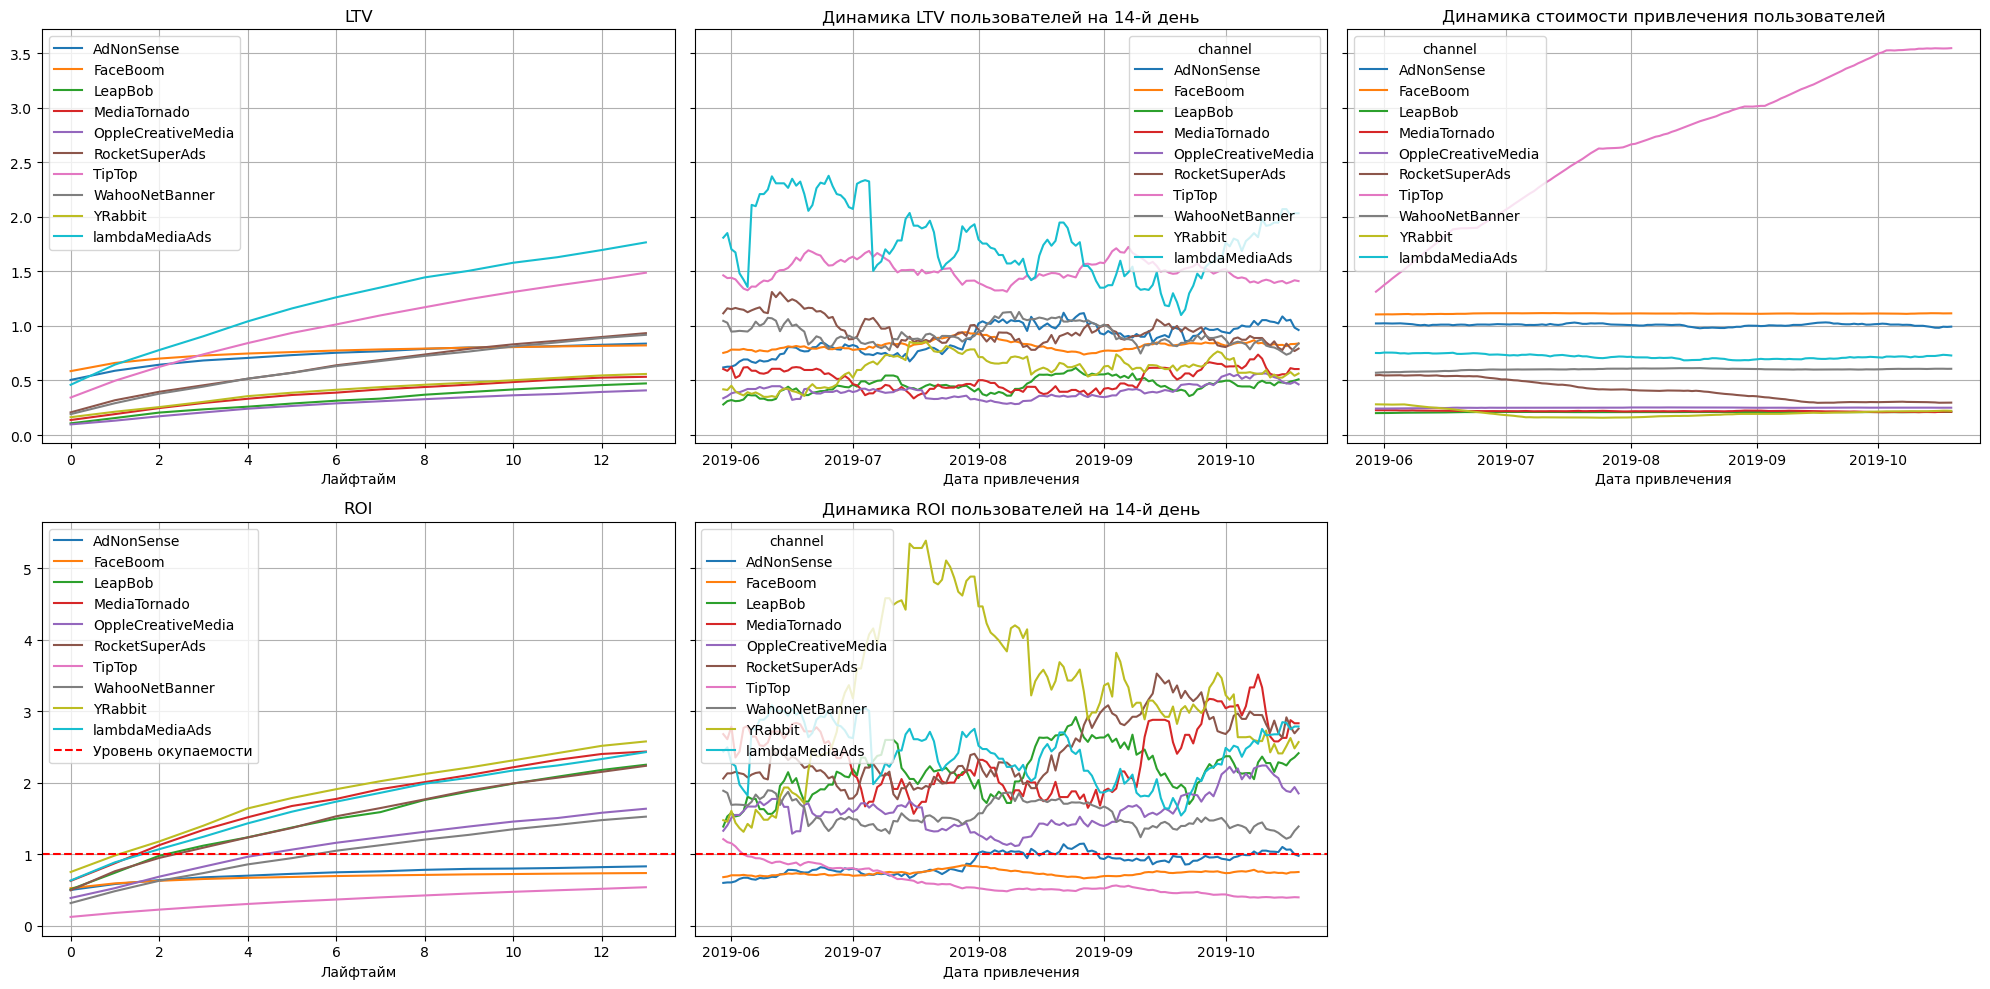

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30
) 

Есть `три фаворита` по LTV: `lambdaMediaAds`, `TipTop`, `RocketSuperAds`. Однако, `TipTop` постоянно `наращивает САС`, чем значительно проигрывает конкурентам. Более того, если смотреть на ROI, то `TipTop не выходит на окупаемость`. По `ROI наилучшие результат` представляют `YRabbit`, `RocketSuperAds`, `MediaTornado` и `lambdaMediaAds`.

# Выводы

Если мы взглянем на общую картину по ROI, то видим что маркетинг в течении лайфтайма не окупается, а в динамике если и имеет положительные показатели на старте, то уже ко второму месяцу становится убыточным. 

Большая часть бюджета на маркетинг расходуется на две компании `FaceBoom` и `TipTop`, при этом эти источники `не окупаются`. Исходя из данных приведенных выше, `наиболее преспективными` выглядят две компании: `lambdaMediaAds`, `RocketSuperAds`. Они дают в совокупности `наилучшие показатели по конверсии, удержанию, LTV, CAC и ROI`. Было бы верным шагом `распределить часть долей` в рекламном бюджете `на lambdaMediaAds и RocketSuperAds` и проследить как будут меняться данные в дальнейшем.

В целом если исходить из сути приложения, оно - развлекательное, что означает импульсивное использование, а не планово-итеративное, и также скорее всего работает по подписке. Для того чтобы принебречь малыми показателями конверсии, стоит иметь довольно высокие значения по LTV. Так как важнее, чтобы 2 из 10 пользователей, которые пришли, остались и платили, чем иметь много one-time buyers. 

Рекомендовано проверить работу приложения на Mac, Android и iPhone на наличие технических сбоев. Так как они показывают отличные данные по конверсии, но сильно падают в показателях удержания. 

Так же стоит проверить насколько эффективно локализовано приложение для US. Данные по US так же показывают высокую конверсию, но слабое удержание.